In [28]:
import pandas as pd
from preprocessing import preprocess_hf_for_lasso
from sklearn.model_selection import train_test_split

TEST_SIZE=0.2

heart_failure = pd.read_csv("heart_failure/train_val_split.csv")
labels = heart_failure.pop("HeartDisease")
preprocessed = preprocess_hf_for_lasso(heart_failure)
x_train, x_val, y_train, y_val = train_test_split(preprocessed, labels, test_size=TEST_SIZE)



[[-1.43638941  0.42660506  0.8393673  ...  0.          0.
   1.        ]
 [-1.75504037 -0.11086166  0.7842735  ...  0.          0.
   1.        ]
 [-0.5866535   0.31911171  0.1506948  ...  0.          1.
   0.        ]
 ...
 [-0.90530447 -1.18579511  0.6098098  ...  0.          1.
   0.        ]
 [ 1.53768626  0.64159175 -0.0421335  ...  0.          1.
   0.        ]
 [ 0.36929939 -0.11086166 -0.61143609 ...  0.          1.
   0.        ]]


In [12]:
from sklearn import linear_model
from sklearn.metrics import balanced_accuracy_score

# logistic regularization with L1 penalty is essentialy lasso
lasso = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso.fit(x_train, y_train)
results = lasso.predict(x_val)
balanced_accuracy_score(y_val, results)

0.8246753246753247

20


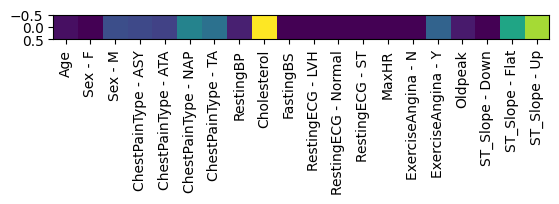

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# features should correspond to the weights. I have done this manually, so there might be errors, but I don't know a better way to do it.
features = ['Age', 'Sex - F', 'Sex - M', 'ChestPainType - ASY', 'ChestPainType - ATA', 'ChestPainType - NAP', 'ChestPainType - TA', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG - LVH', 'RestingECG - Normal', 'RestingECG - ST', 'MaxHR', 'ExerciseAngina - N', 'ExerciseAngina - Y', 'Oldpeak', 'ST_Slope - Down', 'ST_Slope - Flat',  'ST_Slope - Up',]
weights = np.abs(lasso.coef_)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(features)), labels=features, rotation=90)
im = ax.imshow(weights)
plt.show()
